# Stock market data will be extracted from Yahoo Finance from year of 2016 and July 2017. This analysis will be focusing on major indexes such as Nasdaq, S&P 500, Dow Jones and TSX. 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num
from datetime import timezone
from pandas_datareader.data import DataReader

In [2]:
# Convert datetime to UTC timestamp
start_date = datetime(2013,3,11)
fro = int(start_date.replace(tzinfo=timezone.utc).timestamp())
end_date = datetime(2017,7,4)
to = int(end_date.replace(tzinfo=timezone.utc).timestamp())
print(fro)
print(to)

1362960000
1499126400


In [3]:
def get_price_hist(ticker):
    # using Yahoo! Finance api, extract historical stock price using ticker and dates
    url = "https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={fro}&period2={to}&interval=1d&events=history".format(ticker=ticker, fro=fro, to=to)
    data = pd.read_csv(url)
    
    # Convert date to timestamp and make index
    data.index = data["Date"].apply(lambda x: pd.Timestamp(x))
    data.drop("Date", axis=1, inplace=True)
    
    return data

In [32]:
# Historical stock price for NASDAQ
nasdaq_df = get_price_hist('^IXIC')
# Let's label the data
nasdaq_df['label'] = 'NASDAQ'
nasdaq_df.head()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2013-03-11,3237.739990,3252.870117,3233.669922,3252.870117,3252.870117,1628500000,NASDAQ
2013-03-12,3244.850098,3249.780029,3229.919922,3242.320068,3242.320068,1673740000,NASDAQ
2013-03-13,3243.040039,3251.449951,3230.620117,3245.120117,3245.120117,1577280000,NASDAQ
2013-03-14,3253.000000,3258.929932,3250.239990,3258.929932,3258.929932,1651650000,NASDAQ
2013-03-15,3260.459961,3260.620117,3242.649902,3249.070068,3249.070068,2305230000,NASDAQ


In [30]:
# Historical stock price for S&P 500
sp500_df = get_price_hist('^GSPC')
# Let's label the data
sp500_df['label'] = 'S&P 500'
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2013-03-11,1551.150024,1556.270020,1547.359985,1556.219971,1556.219971,3091080000,S&P 500
2013-03-12,1556.219971,1556.770020,1548.239990,1552.479980,1552.479980,3274910000,S&P 500
2013-03-13,1552.479980,1556.390015,1548.250000,1554.520020,1554.520020,3073830000,S&P 500
2013-03-14,1554.520020,1563.319946,1554.520020,1563.229980,1563.229980,3459260000,S&P 500
2013-03-15,1563.209961,1563.619995,1555.739990,1560.699951,1560.699951,5175850000,S&P 500


In [29]:
# Historical stock price for Dow Jones
dj_df = get_price_hist('^DJI')
# Let's label the data
dj_df['label'] = 'Dow Jones'
dj_df.head()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2013-03-11,14397.070313,14448.059570,14373.320313,14447.290039,14447.290039,94880000,Dow Jones
2013-03-12,14447.290039,14478.799805,14412.059570,14450.059570,14450.059570,102100000,Dow Jones
2013-03-13,14450.059570,14472.799805,14411.660156,14455.280273,14455.280273,83920000,Dow Jones
2013-03-14,14455.280273,14539.290039,14455.280273,14539.139648,14539.139648,117390000,Dow Jones
2013-03-15,14539.139648,14539.139648,14470.500000,14514.110352,14514.110352,407770000,Dow Jones


In [28]:
# Historical stock price for Dow Jones
tsx_df = get_price_hist('^GSPTSE')
# Let's label the data
tsx_df['label'] = 'TSX'
tsx_df.head()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2013-03-11,12824.900391,12865.299805,12812.799805,12858.500000,12858.500000,136221700,TSX
2013-03-12,12879.900391,12904.700195,12853.900391,12878.599609,12878.599609,211006000,TSX
2013-03-13,12873.500000,12878.599609,12725.799805,12744.099609,12744.099609,169066900,TSX
2013-03-14,12751.599609,12816.799805,12736.099609,12799.900391,12799.900391,201652800,TSX
2013-03-15,12795.200195,12866.000000,12790.000000,12830.000000,12830.000000,344798800,TSX


In [8]:
stock_df = pd.concat([nasdaq_df, sp500_df, dj_df, tsx_df])

In [9]:
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,
2013-03-11,32.009998,32.389999,31.92,32.310001,28.202150,681000,NASDAQ
2013-03-12,32.049999,32.240002,32.00,32.099998,28.132034,943000,NASDAQ
2013-03-13,32.110001,32.340000,31.91,32.119999,28.149563,958700,NASDAQ
2013-03-14,32.200001,32.779999,32.18,32.599998,28.570230,846400,NASDAQ
2013-03-15,32.770000,32.889999,32.43,32.570000,28.543934,1779200,NASDAQ


In [10]:
stock_df['label'].unique()

array(['NASDAQ', 'S&P 500', 'Dow Jones', 'TSX'], dtype=object)

In [11]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4.347000e+03
mean,8399.213884,8435.140761,8360.860635,8400.504883,8399.355243,9.722680e+08
std,7565.176150,7596.494474,7532.011417,7566.467217,7567.736142,1.540529e+09
min,27.930000,28.110001,27.469999,27.910000,24.459976,2.179000e+05
25%,72.090000,72.429997,71.649998,71.924999,67.396454,2.060250e+06
50%,2443.320068,2450.419922,2436.600098,2440.350098,2440.350098,1.458800e+08
75%,15413.234863,15465.479981,15345.775391,15401.890137,15401.890137,1.359745e+09
max,21521.250000,21562.750000,21464.240234,21528.990234,21528.990234,7.597450e+09


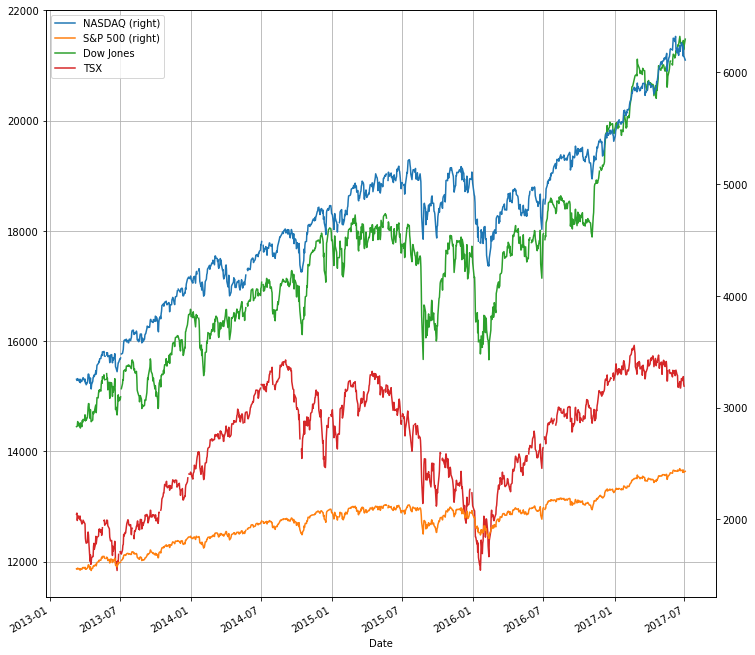

In [34]:
# Historical view of Adj. Close price in one plot
index = pd.DataFrame({"NASDAQ": nasdaq_df["Adj Close"],
                      "S&P 500": sp500_df["Adj Close"],
                      "Dow Jones": dj_df["Adj Close"],
                      "TSX": tsx_df["Adj Close"]})
index.plot(secondary_y = ['S&P 500', 'NASDAQ'], grid=True, figsize=(12,12))

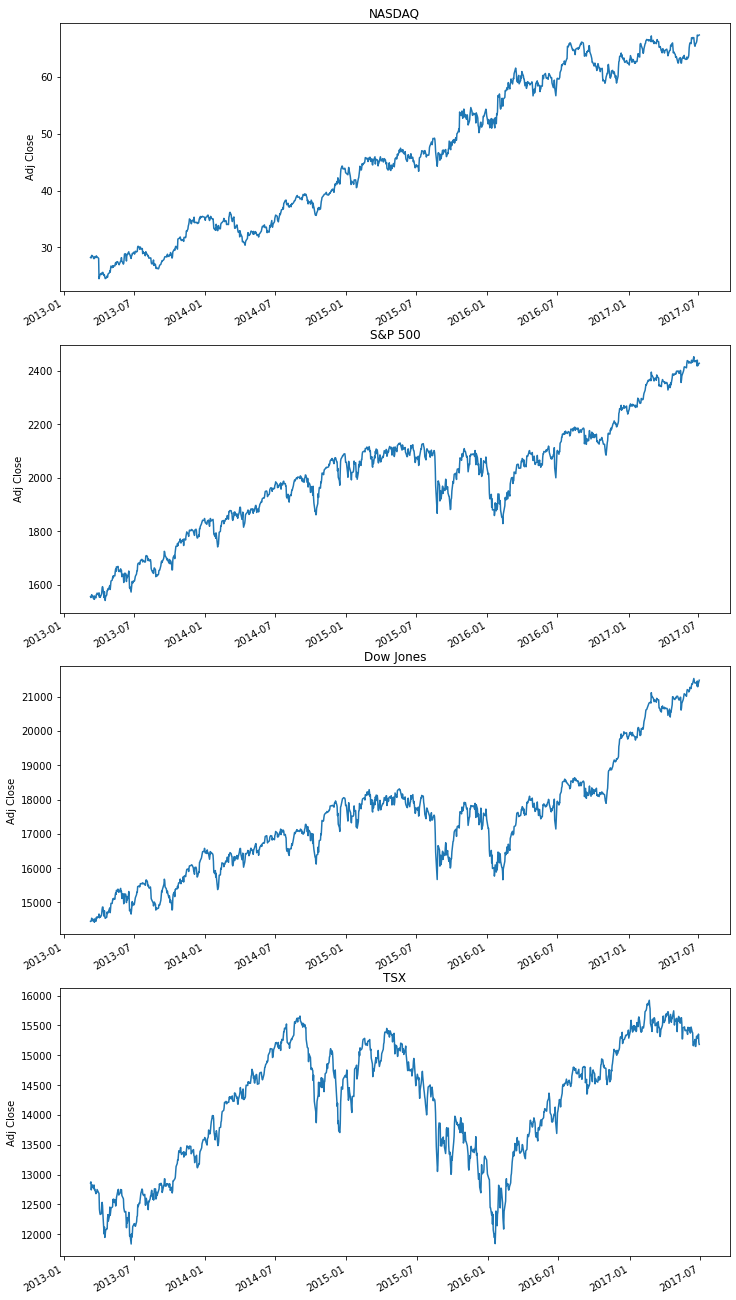

In [23]:
# Historical view of Adj. Close price
plt.figure(figsize=(12,12))
plt.subplots_adjust(top=2, bottom=1.2)
index_list = [nasdaq_df, sp500_df, dj_df, tsx_df]
index_name = ['NASDAQ', 'S&P 500', 'Dow Jones', 'TSX']
for i, index in enumerate(index_list, 1):
    plt.subplot(5,1,i)
    index['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{index_name[i-1]}")

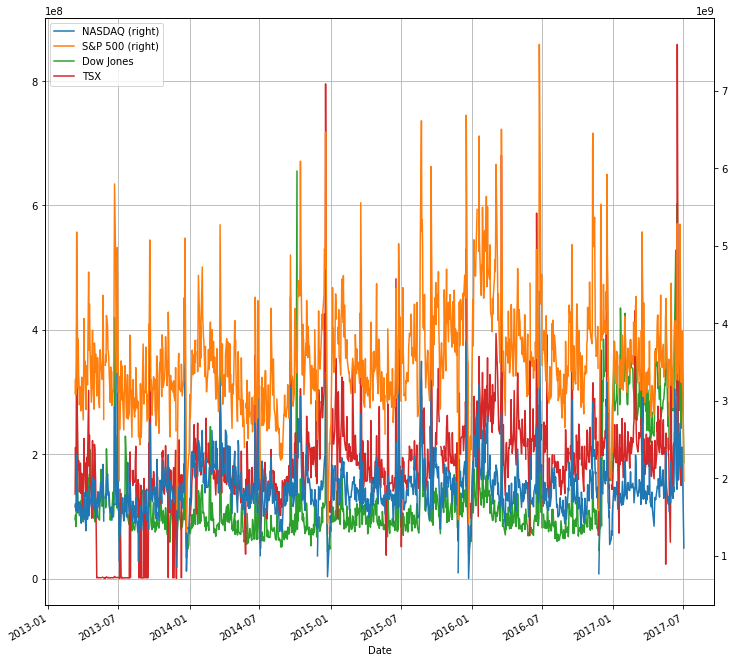

In [35]:
# Historical view of Volume in one plot
index = pd.DataFrame({"NASDAQ": nasdaq_df["Volume"],
                      "S&P 500": sp500_df["Volume"],
                      "Dow Jones": dj_df["Volume"],
                      "TSX": tsx_df["Volume"]})
index.plot(secondary_y = ['S&P 500', 'NASDAQ'], grid=True, figsize=(12,12))

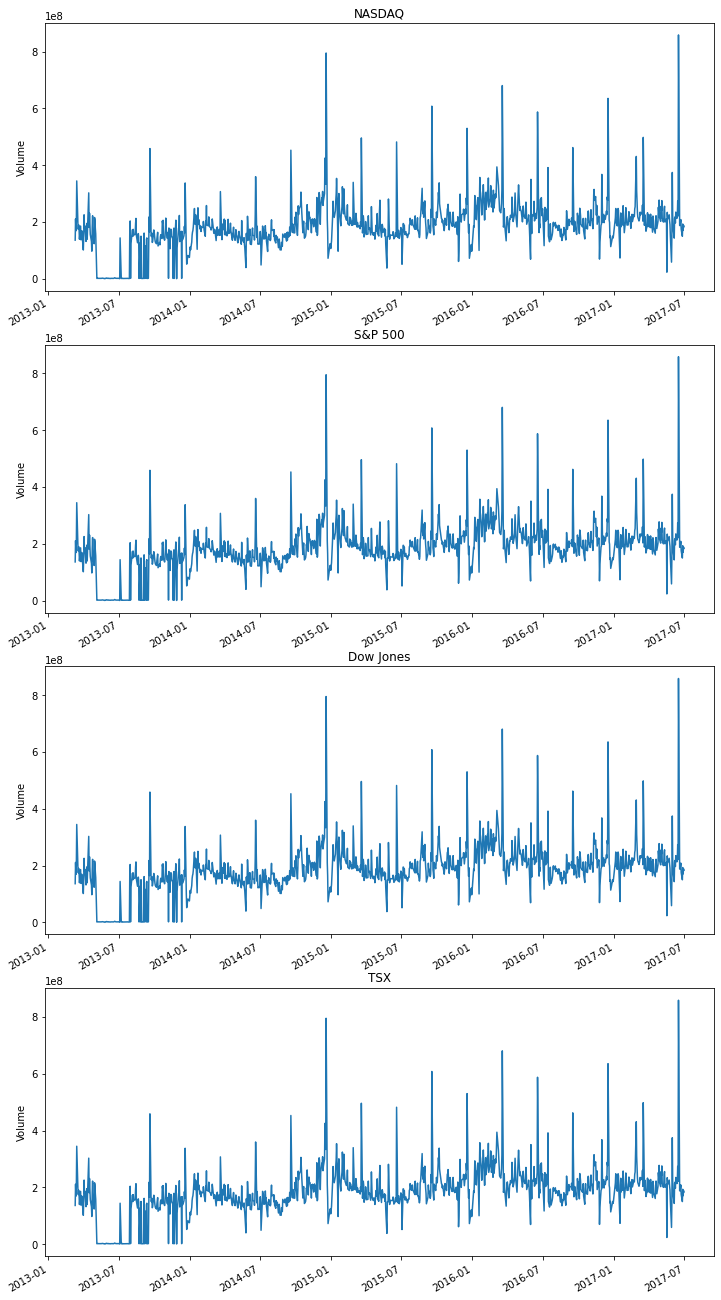

In [48]:
# Historical view of Volume
plt.figure(figsize=(12,12))
plt.subplots_adjust(top=2, bottom=1.2)

for i, index in enumerate(index_list, 1):
    plt.subplot(5,1,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{index_name[i-1]}")

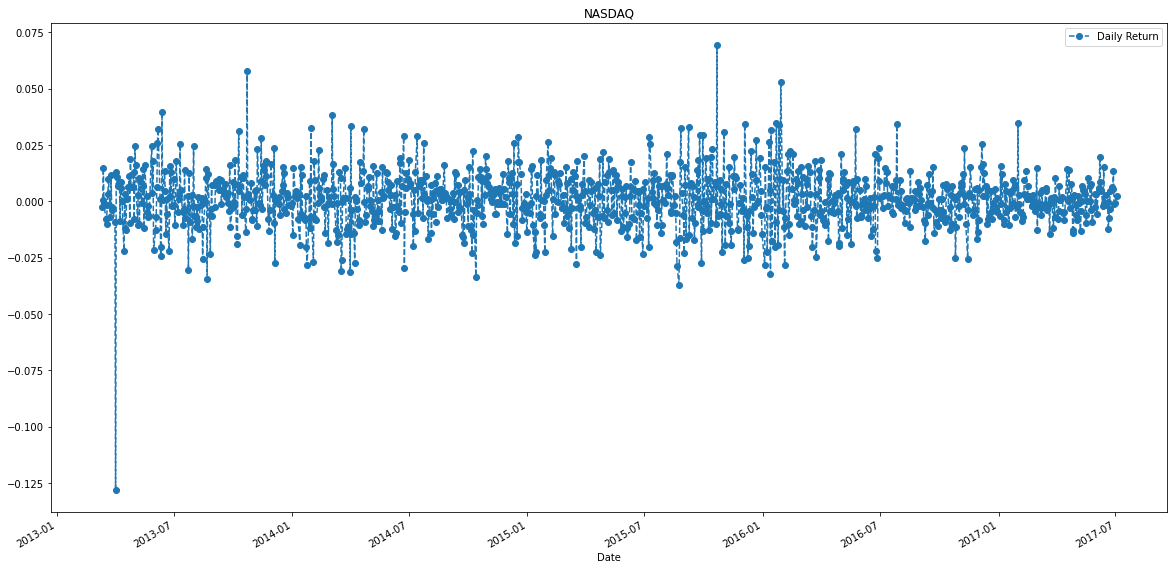

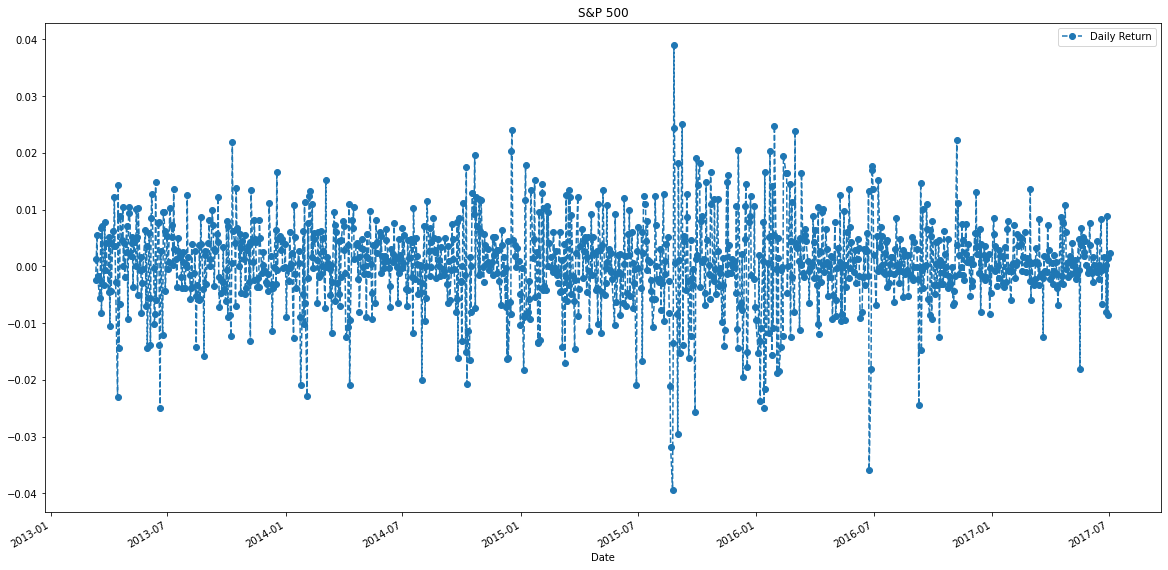

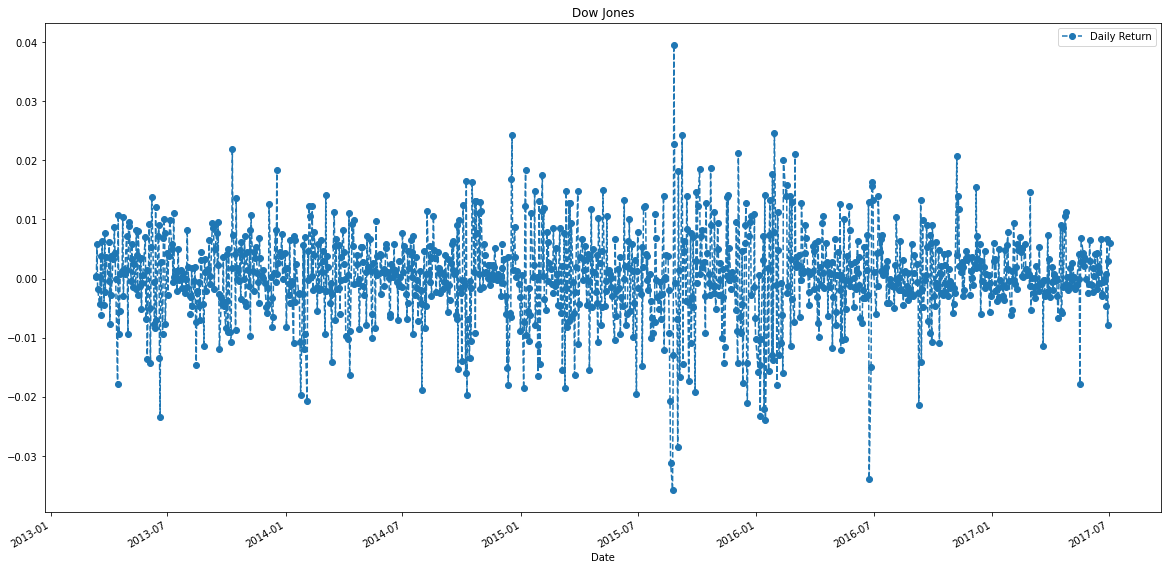

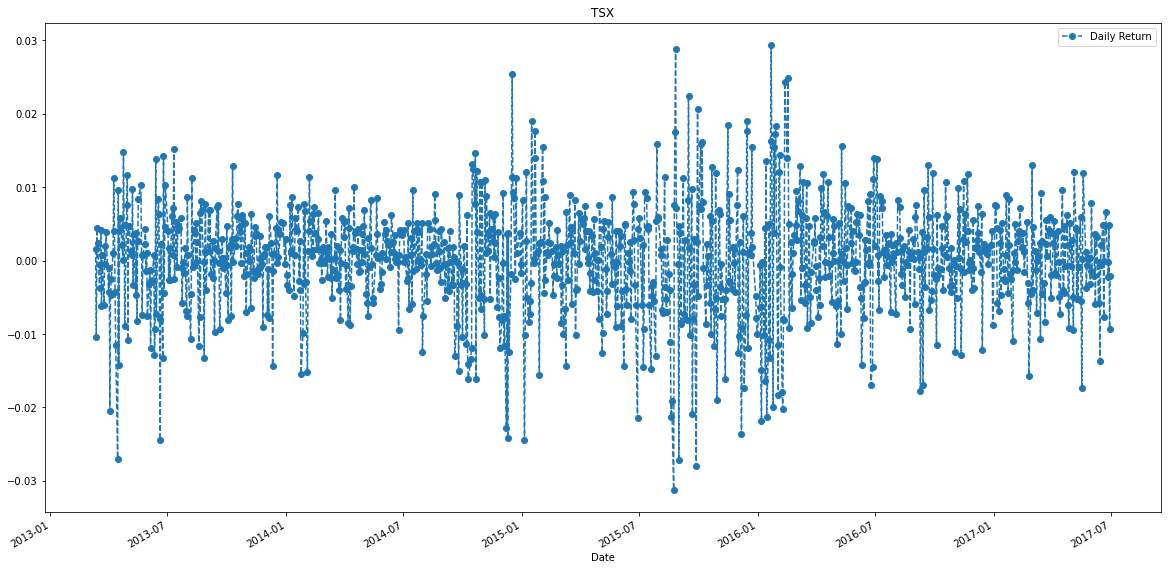

In [46]:
# Daily return of the stock on average
for index in index_list:
    index["Daily Return"] = index['Adj Close'].pct_change()
    
nasdaq_df['Daily Return'].plot(figsize=(20,10), legend=True, linestyle='--', marker='o', title='NASDAQ')
plt.show()
sp500_df['Daily Return'].plot(figsize=(20,10), legend=True, linestyle='--', marker='o', title='S&P 500')
plt.show()
dj_df['Daily Return'].plot(figsize=(20,10), legend=True, linestyle='--', marker='o', title='Dow Jones')
plt.show()
tsx_df['Daily Return'].plot(figsize=(20,10), legend=True, linestyle='--', marker='o', title='TSX')
plt.show()

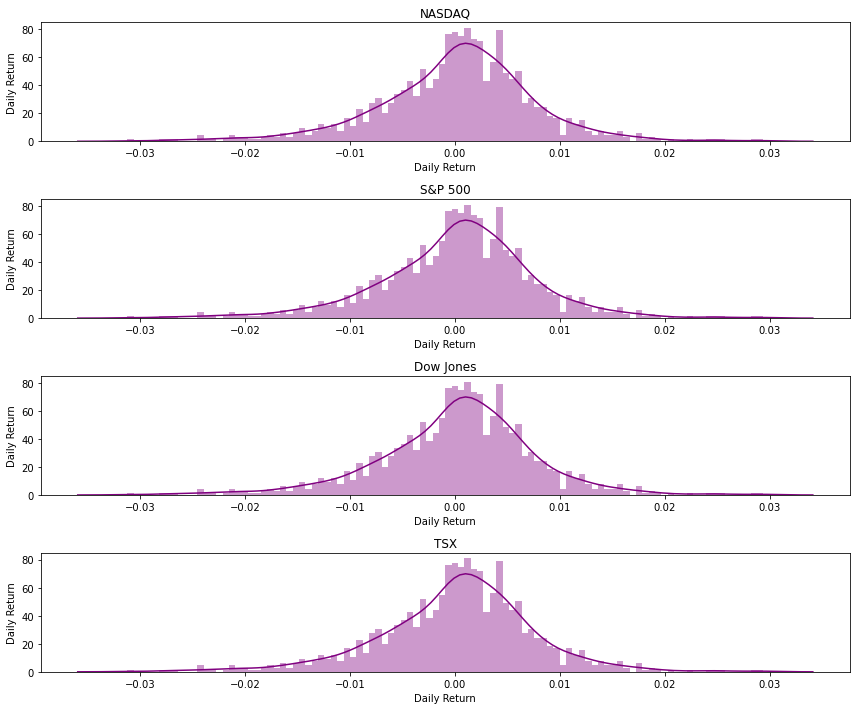

In [52]:
plt.figure(figsize=(12, 12))

for i, index in enumerate(index_list, 1):
    plt.subplot(5, 1, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{index_name[i - 1]}')
    plt.tight_layout()

In [65]:
# Correlation between indexes
index_list2 = ['NDAQ', '^GSPC', '^DJI', '^GSPTSE']
closing_df = DataReader(index_list2, 'yahoo', start_date, end_date)['Adj Close']
closing_df.tail()

Symbols,NDAQ,^GSPC,^DJI,^GSPTSE
Date,,,,
2017-06-28,67.387047,2440.689941,21454.609375,15355.599609
2017-06-29,67.302391,2419.699951,21287.029297,15213.400391
2017-06-30,67.255341,2423.409912,21349.630859,15182.200195
2017-07-03,67.405861,2429.010010,21479.269531,NaN
2017-07-04,NaN,NaN,NaN,15130.599609


In [66]:
closing_pct = closing_df.pct_change()
closing_pct.tail()

Symbols,NDAQ,^GSPC,^DJI,^GSPTSE
Date,,,,
2017-06-28,0.013441,0.008808,0.006755,0.004869
2017-06-29,-0.001256,-0.008600,-0.007811,-0.009260
2017-06-30,-0.000699,0.001533,0.002941,-0.002051
2017-07-03,0.002238,0.002311,0.006072,0.000000
2017-07-04,0.000000,0.000000,0.000000,-0.003399


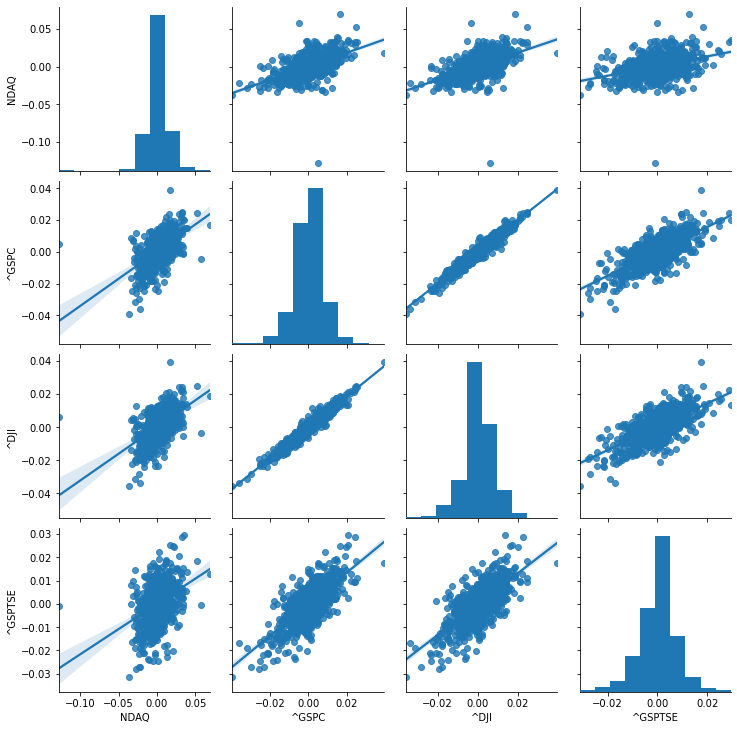

In [67]:
sns.pairplot(closing_pct, kind='reg')

Symbols      NDAQ     ^GSPC      ^DJI   ^GSPTSE
Symbols                                        
NDAQ     1.000000  0.554684  0.539042  0.372857
^GSPC    0.554684  1.000000  0.968815  0.724324
^DJI     0.539042  0.968815  1.000000  0.685239
^GSPTSE  0.372857  0.724324  0.685239  1.000000


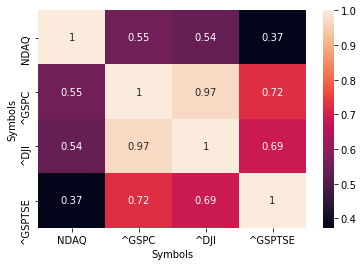

In [68]:
sns.heatmap(closing_pct.corr(), annot=True)
print(closing_pct.corr())

Symbols      NDAQ     ^GSPC      ^DJI   ^GSPTSE
Symbols                                        
NDAQ     1.000000  0.877622  0.842979  0.474294
^GSPC    0.877622  1.000000  0.977353  0.787508
^DJI     0.842979  0.977353  1.000000  0.776430
^GSPTSE  0.474294  0.787508  0.776430  1.000000


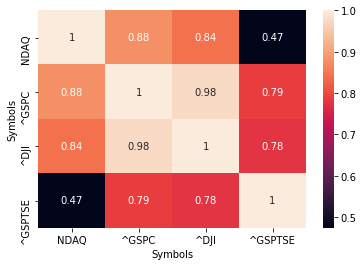

In [69]:
sns.heatmap(closing_df.corr(), annot=True)
print(closing_df.corr())